# Graph Learning
## Lab 3: Clustering

In this lab, you will learn to cluster a graph by Louvain and interpret the results.

<div style="border: 1px solid white; padding: 10px; display: inline-block; max-width: 98%; box-sizing: border-box; word-wrap: break-word;">
<bold>Done in pair:</bold>
<br>
Rafaela de Carvalho Machado Pinheiro
<br>
Bárbara Barsi Duarte Batista da Silva
</div>

## Import

In [314]:
from IPython.display import SVG

In [315]:
import numpy as np
from scipy import sparse

In [316]:
!pip install scikit-network

In [317]:
from sknetwork.data import load_netset, grid, karate_club
from sknetwork.clustering import Louvain, get_modularity
from sknetwork.ranking import PageRank
from sknetwork.visualization import visualize_graph

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Openflights (graph)
* WikiVitals (directed graph)
* Cinema (bipartite graph)

In [318]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

Parsing files...
Done.
Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

The Louvain algorithm aims at maximizing [modularity](https://en.wikipedia.org/wiki/Modularity_(networks)).

## Grid

Consider a grid:

In [319]:
dataset = grid(9, 9, True)
adjacency = dataset.adjacency
position = dataset.position

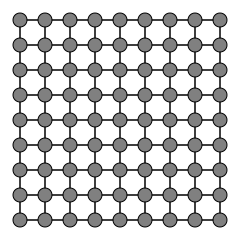

In [320]:
image = visualize_graph(adjacency, position, width=200, height=200)
SVG(image)

## To do

* Cluster the graph by Louvain and return the corresponding modularity.
* Try to shuffle the nodes and observe the results.
* Find a better clustering than Louvain in terms of modularity. Comment your results.

In [321]:
louvain = Louvain()

In [322]:
labels = louvain.fit_predict(adjacency)

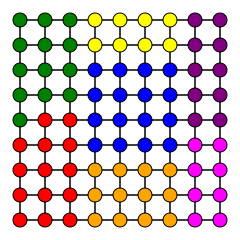

In [323]:
image = visualize_graph(adjacency, position, labels=labels, width=200, height=200)
SVG(image)

In [324]:
get_modularity(adjacency, labels)

np.float64(0.6220341435185185)

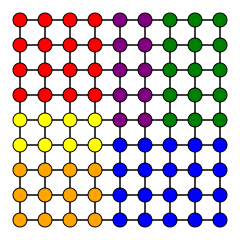

In [325]:
size = adjacency.shape[0]
index = np.arange(size)
np.random.shuffle(index)
adjacency_shuffle = adjacency[index][:, index]
labels_shuffled = louvain.fit_predict(adjacency_shuffle)
image = visualize_graph(adjacency_shuffle, position[index], labels=labels_shuffled, width=200, height=200)
SVG(image)

In [326]:
get_modularity(adjacency_shuffle, labels_shuffled)

np.float64(0.632788387345679)

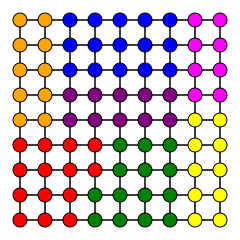

In [327]:
size = adjacency.shape[0]
index_permute = np.random.permutation(size)
# np.random.shuffle(index)
adjacency_permute = adjacency[index_permute][:, index_permute]
labels_permute = louvain.fit_predict(adjacency_permute)
image_permute = visualize_graph(adjacency_permute, position[index_permute], labels=labels_permute, width=200, height=200)
SVG(image_permute)

In [328]:
get_modularity(adjacency_permute, labels_permute)

np.float64(0.619116512345679)

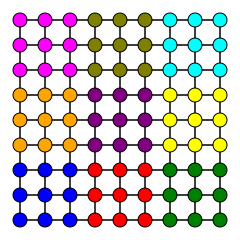

In [329]:
size = adjacency.shape[0]
labels_grid = np.array([((i % 9) // 3) * 3 + (i // 9) // 3 for i in range(size)])
image = visualize_graph(adjacency, position, labels=labels_grid, width=200, height=200)
SVG(image)

In [330]:
get_modularity(adjacency, labels_grid)

np.float64(0.638454861111111)

## Karate Club


The [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) provides ground-truth clusters.

In [331]:
dataset = karate_club(metadata=True)

In [332]:
adjacency = dataset.adjacency
position = dataset.position
labels_true = dataset.labels

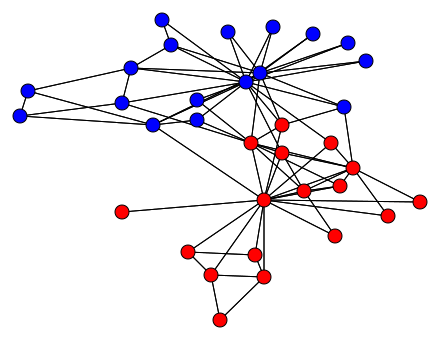

In [333]:
image = visualize_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do

* Cluster the graph by Louvain and display the labels. Give the modularity.
* Compare with the modularity obtained with the ground-truth labels and comment the results.
* Display the aggregate graph after clustering by Louvain (check this [tutorial](https://scikit-network.readthedocs.io/en/latest/tutorials/clustering/louvain.html)).
* Adapt the resolution to get 2 clusters. Compare with the ground-truth and comment the results.

In [334]:
louvain = Louvain()

In [335]:
labels = louvain.fit_predict(adjacency)

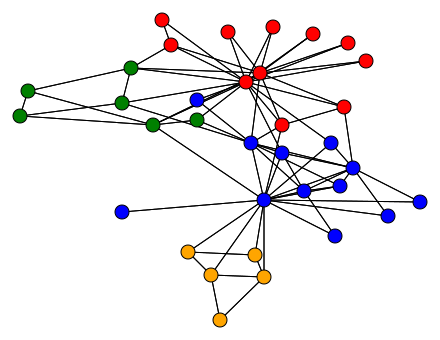

In [336]:
image = visualize_graph(adjacency, position, labels=labels)
SVG(image)

## Openflights


In [344]:
dataset = openflights

In [345]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

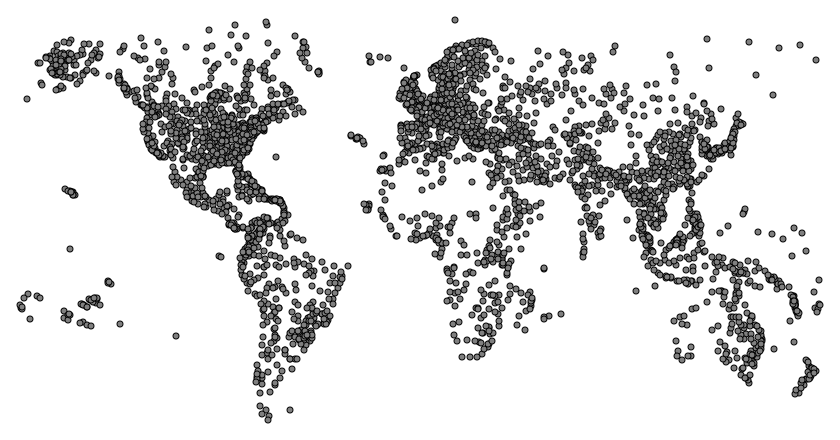

In [346]:
image = visualize_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with the clusters found by Louvain (resolution 1).
* How many clusters are there?
* What is the Simpson index of this clustering? How to interpret this result?
* List the top airport of each cluster in number of flights.
* Display the aggregate graph. Name each cluster by its top airport and display the total traffic of each cluster by the node size.
* Display the same graph restricted to clusters with at least 100 nodes.
* What is the cluster with the highest traffic?

In [348]:
# louvain clusters
louvain = Louvain()
labels = louvain.fit_predict(adjacency)

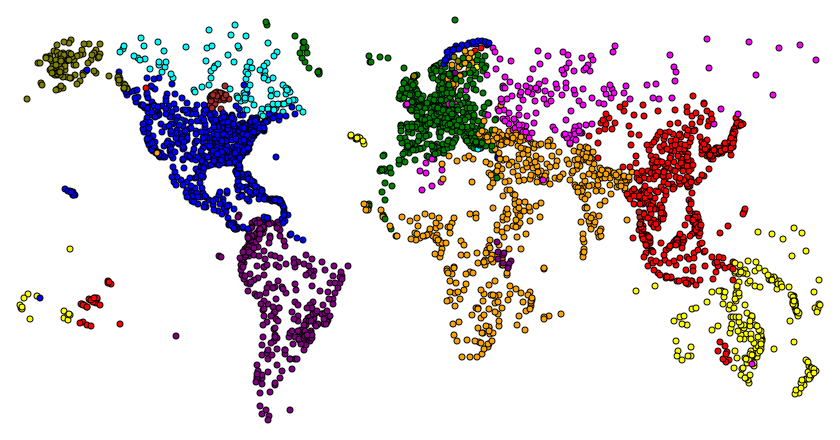

In [349]:
image = visualize_graph(adjacency, position, labels=labels, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

In [350]:
# number of clusters
len(set(labels))

30

In [352]:
# modularity
get_modularity(adjacency, labels, return_all=True)

(np.float64(0.655010075624915),
 np.float64(0.8706267998284419),
 np.float64(0.21561672420352695))

## 2. Directed graphs

## Wikipedia Vitals

In [340]:
graph = wikivitals

In [341]:
adjacency = graph.adjacency
names = graph.names

## To do

* Cluster the graph by Louvain (resolution 1).
* List the top-5 pages of each cluster in terms of Personalized PageRank.
* Display the aggregate graph with the cluster volumes and the name of the top page of each cluster.
* Display the same graph restricted to clusters with at least 100 nodes.
* Among these clusters, which is the strongest? Interpret the result.
* Repeat the same experiments at resolution 2.

## 3. Bipartite graphs

## Cinema

In [342]:
dataset = cinema

In [343]:
biadjacency = dataset.biadjacency
movies = dataset.names_row
actors = dataset.names_col

## To do

* Cluster the graph by Louvain (resolution 1).
* List the 10 largest clusters and display the names of the top-3 actors and top-3 movies of these cluster in terms of Personalized PageRank.